In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-product-review-data/electronics_reviews_uniq.json
/kaggle/input/ecommerce-product-review-data/Product Review Data.csv
/kaggle/input/ecommerce-product-review-data/Automotive_5.json
/kaggle/input/ecommerce-product-review-data/Product Review Large Data.csv
/kaggle/input/ecommerce-product-review-data/Flipkart_Reviews - Electronics.csv


In [196]:
# Import libraries for manipulating numpy arrays and pandas data frames
import pandas as pd
import numpy as np

import re
import string

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Import libraries for splitting dataset and implementing algorithms
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
import time
from sklearn.model_selection import cross_val_score
from collections import defaultdict
from wordcloud import WordCloud,STOPWORDS
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.metrics import classification_report

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [133]:
flipkart_dataframe = pd.read_csv("/kaggle/input/ecommerce-product-review-data/Flipkart_Reviews - Electronics.csv")
flipkart_dataframe.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114


In [134]:
print(flipkart_dataframe.shape)

(9374, 9)


In [136]:
flipkartamazon_df = pd.read_csv("/kaggle/input/ecommerce-product-review-data/Product Review Large Data.csv")

In [137]:
flipkartamazon_df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [138]:
print(flipkartamazon_df.shape)

(10971, 27)


In [139]:
flipkartamazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10971 entries, 0 to 10970
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10971 non-null  object 
 1   asins                 1597 non-null   object 
 2   brand                 10971 non-null  object 
 3   categories            10971 non-null  object 
 4   colors                774 non-null    object 
 5   dateAdded             10971 non-null  object 
 6   dateUpdated           10971 non-null  object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend

In [140]:
flipkart_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     9374 non-null   object
 1   product_title  9374 non-null   object
 2   rating         9374 non-null   int64 
 3   summary        9374 non-null   object
 4   review         9374 non-null   object
 5   location       8081 non-null   object
 6   date           9374 non-null   object
 7   upvotes        9374 non-null   int64 
 8   downvotes      9374 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 659.2+ KB


In [141]:
flipkartamazon_df.isnull().sum()

id                          0
asins                    9374
brand                       0
categories                  0
colors                  10197
dateAdded                   0
dateUpdated                 0
dimension               10406
ean                     10073
keys                     9374
manufacturer            10006
manufacturerNumber      10069
name                     9374
prices                   9374
reviews.date             9754
reviews.doRecommend     10432
reviews.numHelpful      10071
reviews.rating            420
reviews.sourceURLs       9374
reviews.text                0
reviews.title              17
reviews.userCity        10874
reviews.userProvince    10971
reviews.username         9391
sizes                   10971
upc                     10073
weight                  10285
dtype: int64

In [142]:
flipkart_dataframe.isnull().sum()

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64

In [143]:
fkdata = flipkart_dataframe[["product_id","review","rating","summary"]]
flipkartamazon_df=flipkartamazon_df.rename(columns={'id':'product_id','reviews.text':'review','reviews.rating':'rating','reviews.title':'summary'})

In [144]:
fkamazondata = flipkartamazon_df[["product_id","review","rating","summary"]]

In [145]:
fkdata = fkdata.dropna()
fkamazondata = fkamazondata.dropna()

In [146]:
fkdata['review']=fkdata['review']+fkdata['summary']
fkamazondata['review']=fkamazondata['review']+fkamazondata['summary']

In [147]:
fkdata=fkdata[["product_id","review","rating"]]
fkamazondata=fkamazondata[["product_id","review","rating"]]

In [148]:
total_df=[fkdata,fkamazondata]
dataset=pd.concat(total_df)

In [149]:
dataset.head()

,product_id,review,rating
0,ACCFZGAQJGYCYDCM,1-more flexible2-bass is very high3-sound clar...,5.0
1,ACCFZGAQJGYCYDCM,Super sound and good looking I like that prize...,5.0
2,ACCFZGAQJGYCYDCM,Very much satisfied with the device at this pr...,5.0
3,ACCFZGAQJGYCYDCM,"Nice headphone, bass was very good and sound i...",5.0
4,ACCFZGAQJGYCYDCM,Sound quality super battery backup super quali...,5.0


In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19925 entries, 0 to 10970
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  19925 non-null  object 
 1   review      19925 non-null  object 
 2   rating      19925 non-null  float64
dtypes: float64(1), object(2)
memory usage: 622.7+ KB


In [151]:
dataset.describe(include=["O"])

,product_id,review
count,19925,19925
unique,76,8967
top,ACCFR3Q77R6RRGAC,NiceWonderful
freq,1960,22


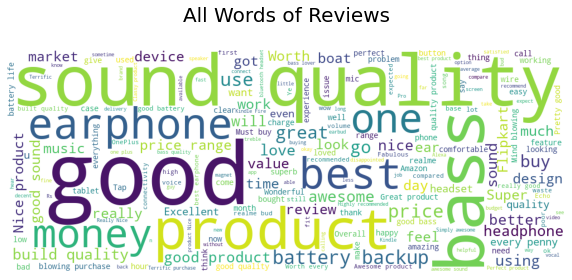

In [152]:
reviewtext = dataset['review']
wordcloud = WordCloud(background_color='white',width=1000,height=400).generate(" ".join(reviewtext))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words of Reviews\n',size=20)
plt.axis('off')
plt.show()

In [153]:
words = ['awesome','great','fantastic','extraordinary','amazing','super','magnificent','stunning','impressive','wonderful','breathtaking','love','content','pleased','happy','glad','satisfied','lucky','shocking','cheerful','wow','sad','unhappy','horrible','regret','bad','terrible','annoyed','disappointed','upset','awful','hate']
reviewtext = " ".join(dataset['review'])

In [154]:
dict_words = {}
for word in reviewtext.split(" "):
    if word in words:
        dict_words[word] = dict_words.get(word,0)+1

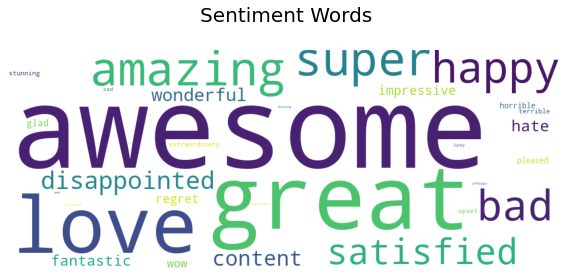

In [155]:
wordcloud = WordCloud(background_color='white',width=1000,height=400).generate_from_frequencies(dict_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



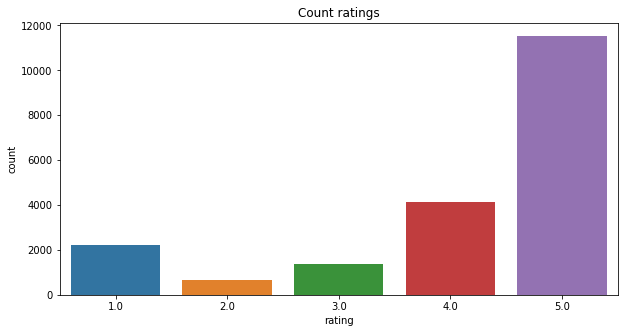

In [156]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['rating'])
plt.title('Count ratings')
plt.show()

In [157]:
data_rating = dataset.groupby("product_id").mean().reset_index()
data_rating = data_rating.sort_values(['rating']).reset_index()

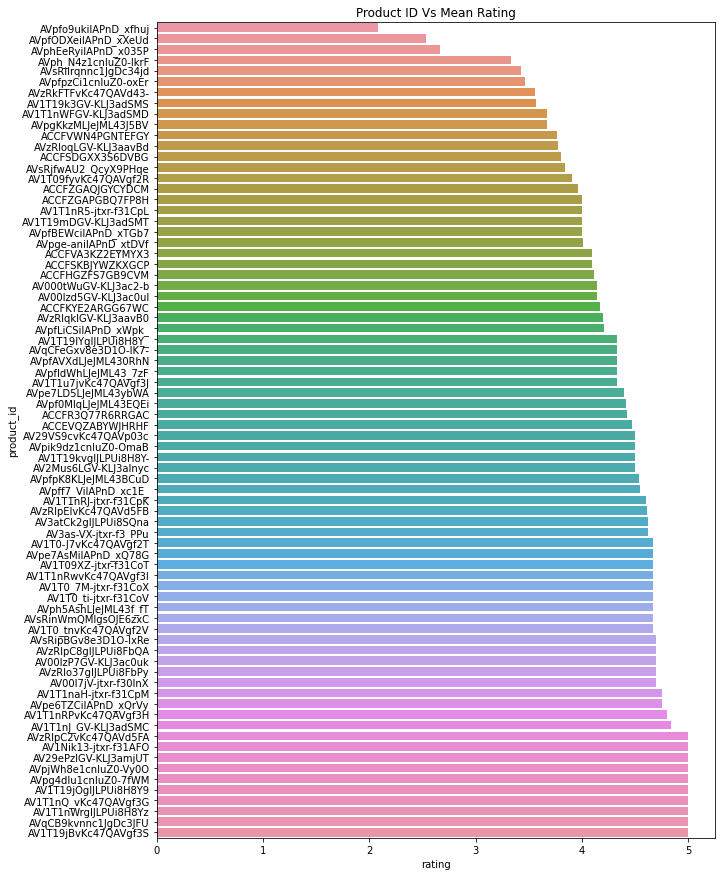

In [158]:
plt.figure(figsize=(10,15))
sns.barplot(x=data_rating["rating"], y=data_rating["product_id"])
plt.title('Product ID Vs Mean Rating')
plt.show()

In [159]:
def clean_reviews(reviewinfo):
    # Convert all the characters to lower case
    reviewinfo = str(reviewinfo).lower()
    # Remove the square braces
    reviewinfo = re.sub('\[.*?\]', '', reviewinfo)
    # Remove the links
    reviewinfo = re.sub('https?://\S+|www\.\S+', '', reviewinfo)
    # Remove the punctuations and number containing words
    reviewinfo = re.sub('<.*?>+', '', reviewinfo)
    reviewinfo = re.sub('[%s]' % re.escape(string.punctuation), '', reviewinfo)
    reviewinfo = re.sub('\n', '', reviewinfo)
    reviewinfo = re.sub('\w*\d\w*', '', reviewinfo)
    return reviewinfo

In [160]:
dataset['review']=dataset['review'].apply(lambda x:clean_reviews(x))
dataset.head()

,product_id,review,rating
0,ACCFZGAQJGYCYDCM,is very clarity is good back up to to ho...,5.0
1,ACCFZGAQJGYCYDCM,super sound and good looking i like that prize...,5.0
2,ACCFZGAQJGYCYDCM,very much satisfied with the device at this pr...,5.0
3,ACCFZGAQJGYCYDCM,nice headphone bass was very good and sound is...,5.0
4,ACCFZGAQJGYCYDCM,sound quality super battery backup super quali...,5.0


In [161]:
# Words Tokenization
dataset['review'] = dataset.apply(lambda row: word_tokenize(row['review']), axis=1) 

In [162]:
dataset.head()

,product_id,review,rating
0,ACCFZGAQJGYCYDCM,"[is, very, clarity, is, good, back, up, to, to...",5.0
1,ACCFZGAQJGYCYDCM,"[super, sound, and, good, looking, i, like, th...",5.0
2,ACCFZGAQJGYCYDCM,"[very, much, satisfied, with, the, device, at,...",5.0
3,ACCFZGAQJGYCYDCM,"[nice, headphone, bass, was, very, good, and, ...",5.0
4,ACCFZGAQJGYCYDCM,"[sound, quality, super, battery, backup, super...",5.0


In [163]:
# Remove Stop Words
stop = stopwords.words('english')
dataset['review'] = dataset['review'].apply(lambda x: [item for item in x if item not in stop])

In [164]:
dataset["review"] = dataset["review"].apply(lambda x: str(' '.join(x))) #joining all tokens

In [165]:
dataset.head()

,product_id,review,rating
0,ACCFZGAQJGYCYDCM,clarity good back hours thing fastest charging...,5.0
1,ACCFZGAQJGYCYDCM,super sound good looking like prizeterrific pu...,5.0
2,ACCFZGAQJGYCYDCM,much satisfied device price point awesome bran...,5.0
3,ACCFZGAQJGYCYDCM,nice headphone bass good sound clear purchase ...,5.0
4,ACCFZGAQJGYCYDCM,sound quality super battery backup super quali...,5.0


In [166]:
dict_sentiment = {1: 0,2: 0,3: 1,4: 2,5: 2}
dataset["sentiment"] = dataset["rating"].map(dict_sentiment)

In [167]:
len(dataset[dataset["sentiment"]==0]),len(dataset[dataset["sentiment"]==1]),len(dataset[dataset["sentiment"]==2])

(2872, 1368, 15685)

In [168]:
dataset.head()

,product_id,review,rating,sentiment
0,ACCFZGAQJGYCYDCM,clarity good back hours thing fastest charging...,5.0,2
1,ACCFZGAQJGYCYDCM,super sound good looking like prizeterrific pu...,5.0,2
2,ACCFZGAQJGYCYDCM,much satisfied device price point awesome bran...,5.0,2
3,ACCFZGAQJGYCYDCM,nice headphone bass good sound clear purchase ...,5.0,2
4,ACCFZGAQJGYCYDCM,sound quality super battery backup super quali...,5.0,2


In [169]:
# Form three dataframes of positive, negative, neutral reviews
positive_reviews = dataset[dataset["sentiment"]==2]
neutral_reviews = dataset[dataset["sentiment"]==1]
negative_reviews = dataset[dataset["sentiment"]==0]

## Function for Monogram construction ##
def monogram(revtext, monogram=1):
    tok = [tok for tok in revtext.lower().split(" ") if tok != "" if tok not in STOPWORDS]
    ngrams = zip(*[tok[i:] for i in range(monogram)])
    return [" ".join(ngram) for ngram in ngrams]

## Function for horizontal bar chart ##
def hbarchart(datf, color):
    t = go.Bar(
        y=datf["word"].values[::-1],
        x=datf["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return t

## Bar Chart of Positive Reviews ##
maxword_dict = defaultdict(int)
for rev in positive_reviews["review"]:
    for term in monogram(rev):
        maxword_dict[term] += 1
sorted_df = pd.DataFrame(sorted(maxword_dict.items(), key=lambda x: x[1])[::-1])
sorted_df.columns = ["word", "wordcount"]
t0 = hbarchart(sorted_df.head(25), 'blue')

## Bar Chart of Neutral Reviews ##
maxword_dict = defaultdict(int)
for rev in neutral_reviews["review"]:
    for term in monogram(rev):
        maxword_dict[term] += 1
sorted_df = pd.DataFrame(sorted(maxword_dict.items(), key=lambda x: x[1])[::-1])
sorted_df.columns = ["word", "wordcount"]
t1 = hbarchart(sorted_df.head(25), 'purple')

## Bar Chart of Negative Reviews ##
maxword_dict = defaultdict(int)
for rev in negative_reviews["review"]:
    for term in monogram(rev):
        maxword_dict[term] += 1
sorted_df = pd.DataFrame(sorted(maxword_dict.items(), key=lambda x: x[1])[::-1])
sorted_df.columns = ["word", "wordcount"]
t2 = hbarchart(sorted_df.head(25), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Positive Reviews Frequent Words", "Neutral Reviews Frequent Words",
                                          "Negative Reviews Frequent Words"])
fig.append_trace(t0, 1, 1)
fig.append_trace(t1, 2, 1)
fig.append_trace(t2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Frequent Word Plots")
iplot(fig, filename='word-plots')

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:464: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [170]:
dataset.head()

,product_id,review,rating,sentiment
0,ACCFZGAQJGYCYDCM,clarity good back hours thing fastest charging...,5.0,2
1,ACCFZGAQJGYCYDCM,super sound good looking like prizeterrific pu...,5.0,2
2,ACCFZGAQJGYCYDCM,much satisfied device price point awesome bran...,5.0,2
3,ACCFZGAQJGYCYDCM,nice headphone bass good sound clear purchase ...,5.0,2
4,ACCFZGAQJGYCYDCM,sound quality super battery backup super quali...,5.0,2


In [171]:
# Building Term Frequency Inverse Document Frequency Matrix
vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(dataset["review"])

In [172]:
x_train, x_test, y_train, y_test = train_test_split(text, dataset["sentiment"], test_size=0.25, random_state=1)

In [173]:
train_accuracy=[]
test_accuracy=[]
exec_time=[]

start_time=time.time()
model_logreg = LogisticRegression(random_state=1,max_iter=200)
model_logreg.fit(x_train, y_train)
y_pred = model_logreg.predict(x_test)
y_pred_tr = model_logreg.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Logistic Regression')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

start_time=time.time()
model_rfc=RandomForestClassifier()
model_rfc.fit(x_train, y_train)
y_pred = model_rfc.predict(x_test)
y_pred_tr = model_rfc.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Random Forest Classifier')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

start_time=time.time()
model_mnb=MultinomialNB()
model_mnb.fit(x_train, y_train)
y_pred = model_mnb.predict(x_test)
y_pred_tr = model_mnb.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Naive Bayes')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

start_time=time.time()
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
y_pred_tr = model_knn.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('KNN')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

start_time=time.time()
model_dt=tree.DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
y_pred_tr = model_dt.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Decision Tree Classifier')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

start_time=time.time()
model_svm=SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
y_pred_tr = model_svm.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('SVM')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

'''
models=['LogReg','RandomFC','NaiveBayes','KNN','DecisionTree','SVM']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,test_accuracy)
plt.show()
'''

Logistic Regression
Test accuracy 0.9375752709755119
Train accuracy 0.9581743960382788
Random Forest Classifier
Test accuracy 0.9779205138498595
Train accuracy 0.9997992371009837
Naive Bayes
Test accuracy 0.8723404255319149
Train accuracy 0.8855651475607308
KNN
Test accuracy 0.9104777197912485
Train accuracy 0.9380311851703138
Decision Tree Classifier
Test accuracy 0.9684865515857085
Train accuracy 0.9997992371009837
SVM
Test accuracy 0.9668807707747893
Train accuracy 0.9933748243324634


"\nmodels=['LogReg','RandomFC','NaiveBayes','KNN','DecisionTree','SVM']\nfig = plt.figure()\nax = fig.add_axes([0,0,1,1])\nax.bar(models,test_accuracy)\nplt.show()\n"

In [174]:
from sklearn.ensemble import BaggingClassifier
start_time=time.time()
model_bc=BaggingClassifier()
model_bc.fit(x_train, y_train)
y_pred = model_bc.predict(x_test)
y_pred_tr = model_bc.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Bagging Classifier')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))


Bagging Classifier
Test accuracy 0.9690887193898033
Train accuracy 0.9971893194137723


In [175]:
from sklearn.ensemble import GradientBoostingClassifier
start_time=time.time()
model_gbc=GradientBoostingClassifier()
model_gbc.fit(x_train, y_train)
y_pred = model_gbc.predict(x_test)
y_pred_tr = model_gbc.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Gradient Boosting Classifier')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))


Gradient Boosting Classifier
Test accuracy 0.9056603773584906
Train accuracy 0.9099913002743759


In [176]:
from sklearn.linear_model import RidgeClassifier
start_time=time.time()
model_rc=RidgeClassifier()
model_rc.fit(x_train, y_train)
y_pred = model_rc.predict(x_test)
y_pred_tr = model_rc.predict(x_train)
stop_time=time.time()
total_time=stop_time-start_time
exec_time.append(total_time)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Ridge Classifier')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))


Ridge Classifier
Test accuracy 0.960457647531112
Train accuracy 0.9862142809342167


<Figure size 432x288 with 0 Axes>

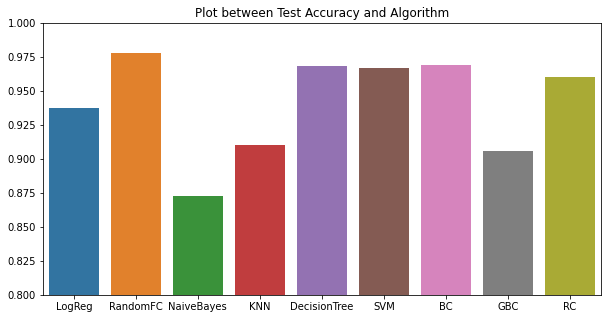

In [179]:
models=['LogReg','RandomFC','NaiveBayes','KNN','DecisionTree','SVM','BC','GBC','RC']
fig = plt.figure()
plt.figure(figsize=(10,5))
#plt.rcParams["figure.figsize"] = (200,300)
#ax = fig.add_axes([0,0,1,1])
sns.barplot(x=models,y=test_accuracy)
plt.ylim([0.8,1.0])
plt.title('Plot between Test Accuracy and Algorithm')
plt.show()

<Figure size 432x288 with 0 Axes>

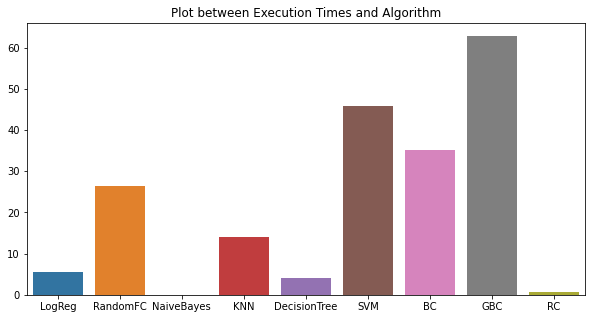

In [180]:
fig = plt.figure()
plt.figure(figsize=(10,5))
#plt.rcParams["figure.figsize"] = (200,300)
#ax = fig.add_axes([0,0,1,1])
sns.barplot(x=models,y=exec_time)
plt.title('Plot between Execution Times and Algorithm')
plt.show()

In [181]:
model_rfc=RandomForestClassifier()
model_rfc.fit(x_train, y_train)
y_pred = model_rfc.predict(x_test)
y_pred_tr = model_rfc.predict(x_train)
test_accuracy.append(sum(y_test == y_pred)/len(y_test))
train_accuracy.append(sum(y_train == y_pred_tr)/len(y_train))
print('Random Forest Classifier')
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Random Forest Classifier
Test accuracy 0.9785226816539543
Train accuracy 0.9997992371009837
Classification Report(Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2156
           1       1.00      1.00      1.00      1023
           2       1.00      1.00      1.00     11764

    accuracy                           1.00     14943
   macro avg       1.00      1.00      1.00     14943
weighted avg       1.00      1.00      1.00     14943

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       716
           1       1.00      0.81      0.90       345
           2       0.98      1.00      0.99      3921

    accuracy                           0.98      4982
   macro avg       0.99      0.92      0.95      4982
weighted avg       0.98      0.98      0.98      4982



In [183]:
def rfc_gini(nestimators):
 model_rfc=RandomForestClassifier(n_estimators=nestimators,criterion="gini")
 model_rfc.fit(x_train, y_train)
 y_pred = model_rfc.predict(x_test)
 y_pred_tr = model_rfc.predict(x_train)
 print('Random Forest Classifier')
 print('For entropy criterion and n_estimators = ',nestimators)
 print('Test accuracy', sum(y_test == y_pred)/len(y_test))
 exp1.append(sum(y_test == y_pred)/len(y_test))
gini_nest=[10,50,100,120,150,200,400]
exp1=[]
for i in gini_nest:
    rfc_gini(i)

Random Forest Classifier
For entropy criterion and n_estimators =  10
Test accuracy 0.9731031714171016
Random Forest Classifier
For entropy criterion and n_estimators =  50
Test accuracy 0.9777197912484946
Random Forest Classifier
For entropy criterion and n_estimators =  100
Test accuracy 0.9781212364512244
Random Forest Classifier
For entropy criterion and n_estimators =  120
Test accuracy 0.9781212364512244
Random Forest Classifier
For entropy criterion and n_estimators =  150
Test accuracy 0.9781212364512244
Random Forest Classifier
For entropy criterion and n_estimators =  200
Test accuracy 0.9783219590525893
Random Forest Classifier
For entropy criterion and n_estimators =  400
Test accuracy 0.9785226816539543


<Figure size 432x288 with 0 Axes>

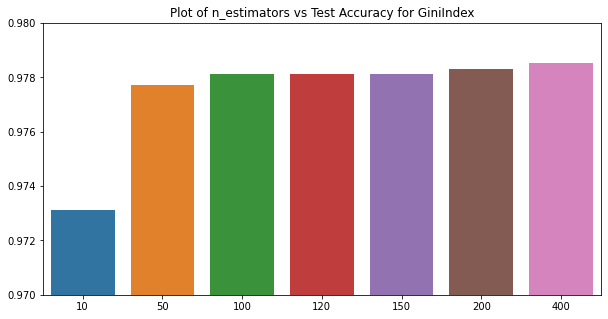

In [186]:
fig = plt.figure()
plt.figure(figsize=(10,5))
sns.barplot(x=gini_nest,y=exp1)
plt.ylim([0.97,0.98])
plt.title('Plot of n_estimators vs Test Accuracy for GiniIndex')
plt.show()

In [187]:
def rfc_entropy(nestimators):
 model_rfc=RandomForestClassifier(n_estimators=nestimators,criterion="entropy")
 model_rfc.fit(x_train, y_train)
 y_pred = model_rfc.predict(x_test)
 y_pred_tr = model_rfc.predict(x_train)
 print('Random Forest Classifier')
 print('For entropy criterion and n_estimators = ',nestimators)
 print('Test accuracy', sum(y_test == y_pred)/len(y_test))
 exp2.append(sum(y_test == y_pred)/len(y_test))
nest=[10,50,100,120, 150,200,400]
exp2=[]
for i in nest:
    rfc_entropy(i)

Random Forest Classifier
For entropy criterion and n_estimators =  10
Test accuracy 0.9704937775993577
Random Forest Classifier
For entropy criterion and n_estimators =  50
Test accuracy 0.9779205138498595
Random Forest Classifier
For entropy criterion and n_estimators =  100
Test accuracy 0.9779205138498595
Random Forest Classifier
For entropy criterion and n_estimators =  120
Test accuracy 0.9775190686471297
Random Forest Classifier
For entropy criterion and n_estimators =  150
Test accuracy 0.9775190686471297
Random Forest Classifier
For entropy criterion and n_estimators =  200
Test accuracy 0.9779205138498595
Random Forest Classifier
For entropy criterion and n_estimators =  400
Test accuracy 0.9775190686471297


<Figure size 432x288 with 0 Axes>

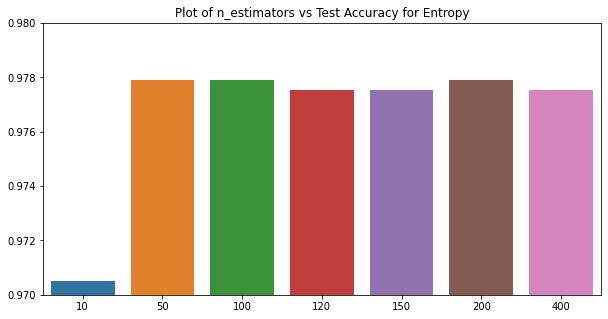

In [188]:
fig = plt.figure()
plt.figure(figsize=(10,5))
sns.barplot(x=nest,y=exp2)
plt.ylim([0.97,0.98])
plt.title('Plot of n_estimators vs Test Accuracy for Entropy')
plt.show()

In [191]:
def multinomialNB(alpha):
 model_mnb=MultinomialNB(alpha=alpha)
 model_mnb.fit(x_train, y_train)
 y_pred = model_mnb.predict(x_test)
 test_accuracy.append(sum(y_test == y_pred)/len(y_test))
 print('Naive Bayes')
 print('Alpha value is ',alpha)
 print('Test accuracy', sum(y_test == y_pred)/len(y_test))
 exp3.append(sum(y_test == y_pred)/len(y_test))
alpha=[0.1,0.2,0.3,0.5,1.0]
exp3=[]
for i in alpha:
    multinomialNB(i)

Naive Bayes
Alpha value is  0.1
Test accuracy 0.9500200722601365
Naive Bayes
Alpha value is  0.2
Test accuracy 0.9383781613809715
Naive Bayes
Alpha value is  0.3
Test accuracy 0.9289441991168206
Naive Bayes
Alpha value is  0.5
Test accuracy 0.9096748293857888
Naive Bayes
Alpha value is  1.0
Test accuracy 0.8723404255319149


<Figure size 432x288 with 0 Axes>

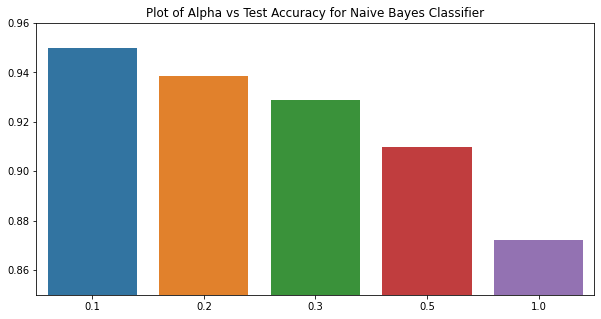

In [195]:
fig = plt.figure()
plt.figure(figsize=(10,5))
sns.barplot(x=alpha,y=exp3)
plt.ylim([0.85,0.96])
plt.title('Plot of Alpha vs Test Accuracy for Naive Bayes Classifier')
plt.show()